## Project: Climate Data Analysis with NumPy
Imagine you’re a data scientist working with a large dataset on monthly climate records. This dataset captures various measurements, including temperature, rainfall, and wind speed for each month over a 10-year period. This project will require you to use all your knowledge of NumPy arrays, data manipulation, statistics, and subsetting.  
#### Dataset Details
Your dataset, climate_data, is a 2D NumPy array with the following structure:  
Each row represents a month (120 months in total for 10 years). Each column represents a different measurement:  
- Column 1: Average temperature (°C)
- Column 2: Total rainfall (mm)
- Column 3: Average wind speed (km/h)  

For example, the first row [20.1, 100.5, 15.2] would mean:
- Average Temperature: 20.1°C
- Total Rainfall: 100.5 mm
- Average Wind Speed: 15.2 km/h
#### Instructions
Use np.random to generate the climate data

In [2]:
import numpy as np

# Set random seed for reproducibility
np.random.seed(0)

# Generate synthetic climate data (120 months, 3 columns)
temperature = np.random.normal(20, 5, 120)  # Temperature (°C)
rainfall = np.random.normal(100, 30, 120)  # Rainfall (mm)
wind_speed = np.random.normal(15, 5, 120)  # Wind speed (km/h)

# Stack data into a single array
cl = np.column_stack((temperature, rainfall, wind_speed))

#### Tasks
1. Exploratory Analysis
- Find the mean and median temperature across all months.
- Calculate the total rainfall across the 10 years.
- Determine the maximum and minimum wind speeds recorded.

2. Monthly Analysis
- Calculate the average temperature per year (use slicing to group months by year).
- Find the month with the highest rainfall and print its temperature, rainfall, and wind speed values.

3. Data Filtering
- Identify and create a new array of months with temperatures above 25°C.
- Create an array of months with rainfall below the yearly average rainfall.

4. Statistical Analysis
- Calculate the standard deviation of the wind speed across all months.
- Calculate the 90th percentile of monthly rainfall to find out which months are in the top 10% for rainfall.

5. Data Manipulation
- Simulate a climate change adjustment by adding 1°C to each month’s temperature and increasing each month’s rainfall by 10%.
- Extract the last 24 months (2 years) and calculate their average temperature, total rainfall, and average wind speed.

6. Advanced Filtering
- Create an array of "extreme months" where the temperature is above 30°C and wind speed is above 20 km/h.

In [36]:
# Exploratory Analysis
print("1. Exploratory Analysis:")
temp_mean = np.mean(cl[:,0]) # Mean and Median Temperature
temp_median = np.median(cl[:,0])
print("Temperature Mean:", temp_mean, "\nTemperature Median:", temp_median)
total_rf = np.sum(cl[:,1])# Count total rainfall
print("Total Rainfall:", total_rf)
max_ws = max(cl[:,2]) # Find max and min wind speed
min_ws = min(cl[:,2])
print("Max Windspeed:", max_ws, "\nMin Windspeed:",min_ws)

# Monthly Analysis
print("\nMonthly Analysis:")
ave_tempyr = []
# Loop through the array in steps of 12
for i in range(0, cl.shape[0], 12):
    # Slice the array from index i to i+12
    slice_data = cl[i:i+12,0]
    # Calculate the average of the slice and append to the averages list
    ave_tempyr.append(np.mean(slice_data))
# Convert to a NumPy array
ave_tempyr = np.array(ave_tempyr)
print("Average Temperature per Year:\n", ave_tempyr)
mt_maxrf = cl[np.argmax(cl[:,0])]
print("Month with Highest Rainfall:\n", mt_maxrf)


# Data Filtering
print("\nData Filtering:")
upbob = cl[cl[:, 0] > 25]
print("Months with Temp > 25:", upbob)
h_ave = []
for i in range(0, cl.shape[0], 12):
    # Slice the array from index i to i+12
    slice_data = cl[i:i+12,1]
    # Calculate the average of the slice and append to the averages list
    slice_ave = np.mean(slice_data)
    
    # Find values in the slice that are higher than the average
    values_above_average = slice_data[slice_data > slice_ave]
    h_ave.append(values_above_average)
print("\nMonths with Above Yearly Average Rainfall:")
for idx, values in enumerate(h_ave):
    print(f"Year {idx + 1}: {values}")


# Statistical Analysis
print("\nStatistical Analysis")
ws_std = np.std(cl[:,2])
rf_per90 = cl[cl[:, 1] > np.percentile(cl[:, 1], 90)]
print("Windspeed Standard Deviation:", ws_std, "\nTop 10% Rainfall:\n", rf_per90)


# Data Manipulation
print("\nData Manipulation")
new_temp = cl[:,0]+1 # Temperature Change
new_rf = cl[:,1]*1.1 # Rainfall Change
new_cl = np.column_stack((new_temp, new_rf, wind_speed)) # New cl Array
print("Simulated Values:\n", new_cl)
# Calculating averages of the simulated values
new_temp_mean = np.mean(new_cl[:23,0])
new_rf_mean = np.mean(new_cl[:23,1])
ws_mean = np.mean(new_cl[:23,2])
print("Average Temperature (24 months):", new_temp_mean, "\nAverage Rainfall (24 Months):", new_rf_mean, "\nAverage Windspeed:", ws_mean)


# Advanced Filtering
print("\nAdvanced Filtering")
ext = new_cl[(new_cl[:,0] > 30) & (new_cl[:,2] > 20)]
print("Extreme Months:\n",ext )

1. Exploratory Analysis:
Temperature Mean: 20.663058730561282 
Temperature Median: 20.639737508652576
Total Rainfall: 11865.900013047738
Max Windspeed: 26.51958348841971 
Min Windspeed: 1.1370362178667488

Monthly Analysis:
Average Temperature per Year:
 [23.74106199 20.2629346  20.47877756 19.20664324 18.227265   17.93312797
 18.57590325 23.09742371 20.90374971 24.20370027]
Month with Highest Rainfall:
 [ 31.34877312 171.49434325   5.31860097]

Data Filtering:
Months with Temp > 25: [[ 28.82026173 111.29276593  11.81281487]
 [ 31.204466   139.7915769   13.5110456 ]
 [ 29.33778995  79.16296421  13.45493515]
 [ 27.27136753 116.17747574  12.12106015]
 [ 27.47039537 117.2977245   11.37201311]
 [ 31.34877312 171.49434325   5.31860097]
 [ 27.66389607  60.52277768  13.44556914]
 [ 27.34679385  86.15246186  15.48700083]
 [ 26.1514534  133.79907766  17.46870889]
 [ 26.01189924  67.60205475  14.4194803 ]
 [ 29.75387698 102.62653724  22.68188527]
 [ 25.69700342  98.82151545   9.36587096]
 [ 27.4

#### Bonus Challenge
- Calculate and visualize the correlation matrix between temperature, rainfall, and wind speed across all months.

In [40]:
# Calculate correlation
corr_matrix = np.corrcoef(new_cl, rowvar=False)
print("Correlation Matrix:\n",corr_matrix)

Correlation Matrix:
 [[ 1.          0.11785821 -0.02509227]
 [ 0.11785821  1.         -0.03388991]
 [-0.02509227 -0.03388991  1.        ]]


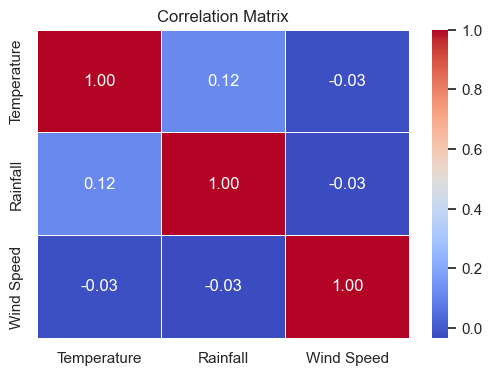

In [ ]:
# Visualize Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize the correlation matrix
sns.set(style="white")  # Set the background style for the plot

# Plot the heatmap
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", 
            xticklabels=["Temperature", "Rainfall", "Wind Speed"], 
            yticklabels=["Temperature", "Rainfall", "Wind Speed"])

# Show the plot
plt.title("Correlation Matrix")
plt.show()
